# A) Monte-Carlo, pt. 1

In [2]:
reset()
x = var('x')
y = var('y')
z = var('z')

C = implicit_plot3d((5*x^2 + 2) == ((0.05 - x)^2 + y^2 + z^2 + 1)^2 ,(x,-2,2),(y,-1,1),(z,-1,1), opacity=0.1)
m = 0
n = 5000
volP = 0

def S(x, y, z):
    return (5*x^2 + 2) - ((0.05 - x)^2 + y^2 + z^2 + 1)^2 

for i in range(0, n):
    x = uniform(-2, 2)
    y = uniform(-1, 1)
    z = uniform(-1, 1)

    if (S(x, y, z) >= 0):
        C += point3d((x,y,z), pointsize=1, color='blue')
        m += 1
    else :
        C += point3d((x,y,z), pointsize=1, color='red')

volP = 4*2*2 #x*y*z

show("vol(S)=", numerical_approx(m/n*volP*1., digits=4))
show(C)

'vol(S)=' 5.654

Graphics3d Object

# B) Monte-Carlo, pt. 2

'vol(S)=' 4.99 ' pour 2 000 iterations'

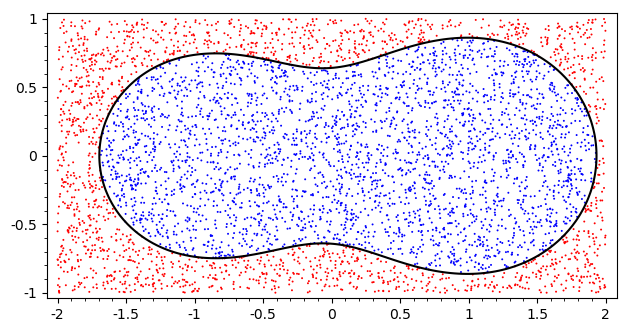

Cette methode se compare a la precedente par son resultat legerement plus faible  


In [3]:
reset()
x = var('x')
y = var('y')

m = 0
n = 5000

aireP = 4*2 #x*y

C = implicit_plot(((0.05 - x)^2 + y^2 + 1)^2 == (5*x^2 + 2),(x,-2,2),(y,-1,1),color = "black") 

def S(x, y):
    return ((5*x^2 + 2)- ((0.05 - x)^2 + y^2 + 1)^2) 

for i in range(0, n): 
    x = uniform(-2, 2)
    y = uniform(-1, 1)

    if (S(x, y) >= 0):
        C += point((x,y), pointsize=2, color='blue')
        m += 1
    else: 
         C += point((x,y), pointsize=2, color='red')

show("vol(S)=", numerical_approx(aireP/n*m, digits=3), " pour 2 000 iterations")
show(C)
print("Cette methode se compare a la precedente par son resultat legerement plus faible  ")

# C) Maillage rectangulaire (sommes de Riemann)

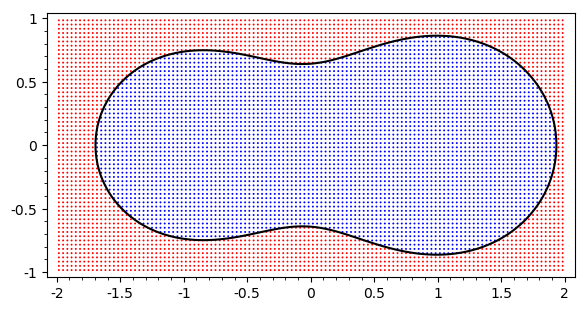

'vol(S)=' 4.98

"Quand m,n tendent vers l'infini, vol(S) tend vers 5"

In [36]:
reset()
x = var('x') 
y = var('y')
xR = 0 
yR = 0
n = 60
m = 2 * n
fPoint = 0
xMax = 0
yMax = 0
largeurR = 4
hauteurR = 2
aireR = largeurR * hauteurR

C = implicit_plot(((0.05 - x)^2 + y^2 + 1)^2 == (5*x^2 + 2),(x,-2,2),(y,-1,1),color = "black")


def S(x, y):
    return ((5*x^2 + 2)- ((0.05 - x)^2 + y^2 + 1)^2)


for i in range(0, n):
    xMax = 0 
    yMax += hauteurR / n
    yR = yMax - ((hauteurR / n) / 2) - hauteurR/2

    for j in range(0, m):
        xMax += (largeurR / m)
        xR = xMax - ((largeurR / m) / 2) - largeurR/2

        if (S(xR, yR) >= 0):
            C += point((xR, yR), pointsize=2, color='blue')
            fPoint += 1
        else: 
            C += point((xR, yR), pointsize=2, color='red')
show(C)
show("vol(S)=", numerical_approx(aireR / (n*m) * fPoint, digits=3))
show("Quand m,n tendent vers l'infini, vol(S) tend vers 5")